In [1]:
import numpy as np
import pandas as pd
import math
import graphviz 
from IPython.display import display

# full_tree_label = "label = \"Full Binary Tree\" \n"
# full_tree_source = header + "subgraph cluster_full_tree {\n" + full_tree + full_tree_label +  footer

header = "digraph sample {\n"
footer = "}\n"

prefix = "A"

def make_child(parent, child, prefix="A", left=True):
    return prefix + str(parent) + " -> " + prefix + str(child) + "\n" 

def make_node(ind, prefix="A", color="black", label="", shape="circle", xlabel=""):
    if label == "":
        label = str(ind)
    node_str = prefix + str(ind) +"[label=\"" + label + "\" color=" + color + " shape=" + shape
    if xlabel != "":
        node_str += " xlabel=\"" + xlabel + "\""
    node_str += "]\n"
    return node_str 



class Tree:
    header = "digraph sample {\n"
    footer = "}\n"
    prefix = "A"
    subgraph_header = "subgraph "

    def __init__(self, name, nodes_num, prefix=prefix):
        self.name = name
        self.cluster_counter = 0
        self.tree_code = "" 
        self.label = "label = \"" + self.name + "\" \n"
        self.prefix = prefix
        if nodes_num > 0:
            for i in range(nodes_num):
                self.tree_code += make_node(i, prefix=self.prefix)

    def make_node(self, ind, color="black", label="", shape="circle", xlabel=""):
        if label == "":
            label = str(ind)
        self.tree_code += make_node(ind, prefix=self.prefix, color=color, label=label, shape=shape, xlabel=xlabel)
        
    def make_child(self, parent, child):
        self.tree_code += make_child(parent, child, prefix=self.prefix)
            
    def set_subgraph(self, nodes, color="red", counter=-1):
        if counter == -1:
            counter = self.cluster_counter
        self.tree_code += "subgraph cluster_" + self.name + str(self.cluster_counter) + " {\n"
        self.tree_code += ';'.join(self.prefix + str(n) for n in nodes) + "\n"
        self.tree_code += "label = \"N_" + str(counter) + "\"\n" 
        self.tree_code += "graph[color=" + color + "]\n" 
        self.tree_code += "}\n"
        self.cluster_counter += 1

    def get_graph_code(self, subgraph=False, cluster=False):
        if cluster:
            cluster_prefix = "cluster_"
        else:
            cluster_prefix = ""
        if subgraph:
            tree_source = Tree.subgraph_header + cluster_prefix + self.name + " {\n"+ self.tree_code + self.label + footer
        else:
            tree_source = header + self.tree_code + footer
            
        return tree_source
            
    def get_graph(self):
        tree_source = header + self.tree_code + footer
        #print(tree_source)
        gvz = graphviz.Source(tree_source)
        return gvz



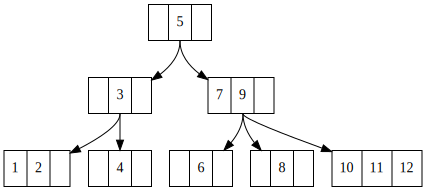

In [2]:
btree_source = "digraph test {\n"
btree_source += "node [shape=record];\n"
btree_source += "struct0 [label=\" | <s01> 5 | \"];\n"
btree_source += "struct1 [label=\" | <s11> 3 | \"];\n"
btree_source += "struct2 [label=\"<s20> 1 | <s21> 2 | \"];\n"
btree_source += "struct3 [label=\"| <s31> 4 | \"];\n"
btree_source += "struct4 [label=\"<s30> 7 | <s41> 9| \"];\n"
btree_source += "struct5 [label=\" | <s51> 6 | \"];\n"
btree_source += "struct6 [label=\"| <s61> 8 | \"];\n"
btree_source += "struct7 [label=\"<s30> 10 | <s71> 11 | <s72> 12\"];\n"
btree_source += "struct0:s01 -> struct1\n"
btree_source += "struct0:s01 -> struct4\n"

btree_source += "struct1:s11 -> struct2\n"
btree_source += "struct1:s11 -> struct3\n"

btree_source += "struct4:s41 -> struct5\n"
btree_source += "struct4:s41 -> struct6\n"
btree_source += "struct4:s41 -> struct7\n"

btree_source += "}\n"

gvz = graphviz.Source(btree_source)

display(gvz)

$$ n \geq 1+ (t-1) \sum_{i=1}^h 2t^{i-1} $$ 
$$ n \geq 1+ 2(t-1)\frac{t^h - 1}{t-1} = 2t^h - 1 $$
$$ h \leq \log_t \frac{n+1}{2} $$ 


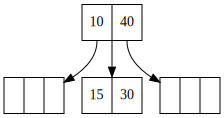

In [34]:
btree_source = "digraph test {\n"
btree_source += "node [shape=record];\n"
#btree_source += "struct0 [label=\" <s00> 10| <s01> 40 | <s02> 60\"];\n"

btree_source += "struct0 [label=\" <s00> 10| <s01> 40\"];\n"

btree_source += "struct1 [label=\" |  | \"];\n"
#btree_source += "struct2 [label=\"<s20> 15 | <s21> 20 | <s22> 25 | <s23> 30 | <s24> 35\"];\n"
btree_source += "struct2 [label=\"<s20> 15 |  <s23> 30 \"];\n"

btree_source += "struct3 [label=\"|  | \"];\n"
#btree_source += "struct4 [label=\"| | \"];\n"
btree_source += "struct0:s00 -> struct1\n"
btree_source += "struct0:s02 -> struct2\n"

btree_source += "struct0:s01 -> struct3\n"
#btree_source += "struct0:s02 -> struct4\n"

btree_source += "}\n"

gvz = graphviz.Source(btree_source)

display(gvz)

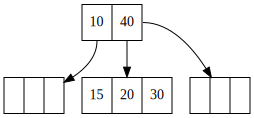

In [31]:
btree_source = "digraph test {\n"
btree_source += "node [shape=record];\n"
#btree_source += "struct0 [label=\" <s00> 10| <s01> 40 | <s02> 60\"];\n"

btree_source += "struct0 [label=\" <s00> 10| <s01> 40\"];\n"

btree_source += "struct1 [label=\" |  | \"];\n"
#btree_source += "struct2 [label=\"<s20> 15 | <s21> 20 | <s22> 25 | <s23> 30 | <s24> 35\"];\n"
btree_source += "struct2 [label=\"<s20> 15 | <s21> 20  | <s23> 30 \"];\n"

btree_source += "struct3 [label=\"|  | \"];\n"
#btree_source += "struct4 [label=\"| | \"];\n"
btree_source += "struct0:s00 -> struct1\n"
btree_source += "struct0:s01 -> struct2\n"

btree_source += "struct0:s01 -> struct3\n"
#btree_source += "struct0:s02 -> struct4\n"

btree_source += "}\n"

gvz = graphviz.Source(btree_source)

display(gvz)

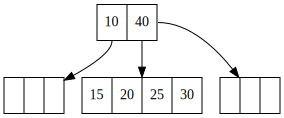

In [18]:
btree_source = "digraph test {\n"
btree_source += "node [shape=record];\n"
#btree_source += "struct0 [label=\" <s00> 10| <s01> 40 | <s02> 60\"];\n"

btree_source += "struct0 [label=\" <s00> 10| <s01> 40\"];\n"

btree_source += "struct1 [label=\" |  | \"];\n"
btree_source += "struct2 [label=\"<s20> 15 | <s21> 20 | <s22> 25 | <s23> 30 \"];\n"
#btree_source += "struct2 [label=\"<s20> 15 | <s21> 20  | <s23> 30 | <s24> 35\"];\n"

btree_source += "struct3 [label=\"|  | \"];\n"
#btree_source += "struct4 [label=\"| | \"];\n"
btree_source += "struct0:s00 -> struct1\n"
btree_source += "struct0:s01 -> struct2\n"

btree_source += "struct0:s01 -> struct3\n"
#btree_source += "struct0:s02 -> struct4\n"

btree_source += "}\n"

gvz = graphviz.Source(btree_source)

display(gvz)

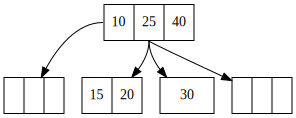

In [19]:
btree_source = "digraph test {\n"
btree_source += "node [shape=record];\n"
#btree_source += "struct0 [label=\" <s00> 10| <s01> 40 | <s02> 60\"];\n"

btree_source += "struct0 [label=\" <s00> 10| <s01> 25  | <s02> 40\"];\n"

btree_source += "struct1 [label=\" |  | \"];\n"
btree_source += "struct2 [label=\"<s20> 15 | <s21> 20 \"];\n"
btree_source += "struct21 [label=\"<s23> 30 \"];\n"

btree_source += "struct3 [label=\"|  | \"];\n"
#btree_source += "struct4 [label=\"| | \"];\n"
btree_source += "struct0:s00 -> struct1\n"
btree_source += "struct0:s01 -> struct2\n"
btree_source += "struct0:s01 -> struct21\n"

btree_source += "struct0:s01 -> struct3\n"
#btree_source += "struct0:s02 -> struct4\n"

btree_source += "}\n"

gvz = graphviz.Source(btree_source)

display(gvz)

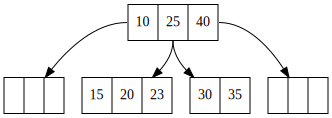

In [23]:
btree_source = "digraph test {\n"
btree_source += "node [shape=record];\n"
#btree_source += "struct0 [label=\" <s00> 10| <s01> 40 | <s02> 60\"];\n"

btree_source += "struct0 [label=\" <s00> 10| <s01> 25  | <s02> 40\"];\n"

btree_source += "struct1 [label=\" |  | \"];\n"
btree_source += "struct2 [label=\"<s20> 15 | <s21> 20 | <s22> 23 \"];\n"
btree_source += "struct21 [label=\"<s211> 30 | <s212> 35 \"];\n"

btree_source += "struct3 [label=\"|  | \"];\n"
#btree_source += "struct4 [label=\"| | \"];\n"
btree_source += "struct0:s00 -> struct1\n"
btree_source += "struct0:s01 -> struct2\n"
btree_source += "struct0:s01 -> struct21\n"

btree_source += "struct0:s02 -> struct3\n"
#btree_source += "struct0:s02 -> struct4\n"

btree_source += "}\n"

gvz = graphviz.Source(btree_source)

display(gvz)

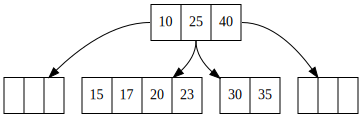

In [24]:
btree_source = "digraph test {\n"
btree_source += "node [shape=record];\n"
#btree_source += "struct0 [label=\" <s00> 10| <s01> 40 | <s02> 60\"];\n"

btree_source += "struct0 [label=\" <s00> 10| <s01> 25  | <s02> 40\"];\n"

btree_source += "struct1 [label=\" |  | \"];\n"
btree_source += "struct2 [label=\"<s20> 15 | <s200> 17 | <s21> 20 | <s22> 23 \"];\n"
btree_source += "struct21 [label=\"<s211> 30 | <s212> 35 \"];\n"

btree_source += "struct3 [label=\"|  | \"];\n"
#btree_source += "struct4 [label=\"| | \"];\n"
btree_source += "struct0:s00 -> struct1\n"
btree_source += "struct0:s01 -> struct2\n"
btree_source += "struct0:s01 -> struct21\n"

btree_source += "struct0:s02 -> struct3\n"
#btree_source += "struct0:s02 -> struct4\n"

btree_source += "}\n"

gvz = graphviz.Source(btree_source)

display(gvz)

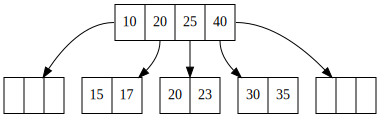

In [28]:
btree_source = "digraph test {\n"
btree_source += "node [shape=record];\n"
#btree_source += "struct0 [label=\" <s00> 10| <s01> 40 | <s02> 60\"];\n"

btree_source += "struct0 [label=\" <s00> 10| <s001> 20 | <s01> 25  | <s02> 40\"];\n"

btree_source += "struct1 [label=\" |  | \"];\n"
btree_source += "struct211 [label=\"<s20> 15 | <s200> 17  \"];\n"
btree_source += "struct212 [label=\"<s21> 20 | <s22> 23 \"];\n"

btree_source += "struct21 [label=\"<s211> 30 | <s212> 35 \"];\n"

btree_source += "struct3 [label=\"|  | \"];\n"
#btree_source += "struct4 [label=\"| | \"];\n"
btree_source += "struct0:s00 -> struct1\n"
btree_source += "struct0:s001 -> struct211\n"
btree_source += "struct0:s01 -> struct212\n"

btree_source += "struct0:s02 -> struct21\n"

btree_source += "struct0:s02 -> struct3\n"
#btree_source += "struct0:s02 -> struct4\n"

btree_source += "}\n"

gvz = graphviz.Source(btree_source)

display(gvz)

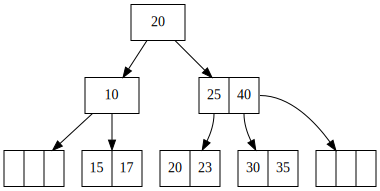

In [30]:
btree_source = "digraph test {\n"
btree_source += "node [shape=record];\n"

btree_source += "struct0 [label=\" <s0> 20 \"];\n"
btree_source += "struct00 [label=\" <s00> 10 \"];\n"
btree_source += "struct01 [label=\" <s01> 25  | <s02> 40\"];\n"

btree_source += "struct1 [label=\" |  | \"];\n"
btree_source += "struct211 [label=\"<s20> 15 | <s200> 17  \"];\n"
btree_source += "struct212 [label=\"<s21> 20 | <s22> 23 \"];\n"

btree_source += "struct21 [label=\"<s211> 30 | <s212> 35 \"];\n"

btree_source += "struct3 [label=\"|  | \"];\n"
#btree_source += "struct4 [label=\"| | \"];\n"

btree_source += "struct0 -> struct00\n"
btree_source += "struct0 -> struct01\n"

btree_source += "struct00:s00 -> struct1\n"
btree_source += "struct00:s001 -> struct211\n"
btree_source += "struct01:s01 -> struct212\n"

btree_source += "struct01:s02 -> struct21\n"

btree_source += "struct01:s02 -> struct3\n"
#btree_source += "struct0:s02 -> struct4\n"

btree_source += "}\n"

gvz = graphviz.Source(btree_source)

display(gvz)

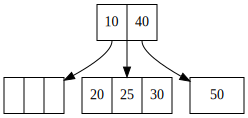

In [38]:
# shifting
btree_source = "digraph test {\n"
btree_source += "node [shape=record];\n"
#btree_source += "struct0 [label=\" <s00> 10| <s01> 40 | <s02> 60\"];\n"

btree_source += "struct0 [label=\" <s00> 10| <s01> 40\"];\n"

btree_source += "struct1 [label=\" |  | \"];\n"
#btree_source += "struct2 [label=\"<s20> 15 | <s21> 20 | <s22> 25 | <s23> 30 | <s24> 35\"];\n"
btree_source += "struct2 [label=\"<s20> 20 |  <s21> 25 | <s23> 30 \"];\n"

btree_source += "struct3 [label=\" 50 \"];\n"
#btree_source += "struct4 [label=\"| | \"];\n"
btree_source += "struct0:s00 -> struct1\n"
btree_source += "struct0:s02 -> struct2\n"

btree_source += "struct0:s01 -> struct3\n"
#btree_source += "struct0:s02 -> struct4\n"

btree_source += "}\n"

gvz = graphviz.Source(btree_source)

display(gvz)

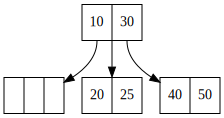

In [39]:
# shifting
btree_source = "digraph test {\n"
btree_source += "node [shape=record];\n"
#btree_source += "struct0 [label=\" <s00> 10| <s01> 40 | <s02> 60\"];\n"

btree_source += "struct0 [label=\" <s00> 10| <s01> 30\"];\n"

btree_source += "struct1 [label=\" |  | \"];\n"
#btree_source += "struct2 [label=\"<s20> 15 | <s21> 20 | <s22> 25 | <s23> 30 | <s24> 35\"];\n"
btree_source += "struct2 [label=\"<s20> 20 |  <s21> 25  \"];\n"

btree_source += "struct3 [label=\" 40 |  50 \"];\n"
#btree_source += "struct4 [label=\"| | \"];\n"
btree_source += "struct0:s00 -> struct1\n"
btree_source += "struct0:s02 -> struct2\n"

btree_source += "struct0:s01 -> struct3\n"
#btree_source += "struct0:s02 -> struct4\n"

btree_source += "}\n"

gvz = graphviz.Source(btree_source)

display(gvz)

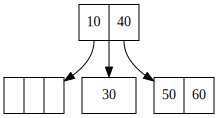

In [40]:
# shifting 2
btree_source = "digraph test {\n"
btree_source += "node [shape=record];\n"
#btree_source += "struct0 [label=\" <s00> 10| <s01> 40 | <s02> 60\"];\n"

btree_source += "struct0 [label=\" <s00> 10| <s01> 40\"];\n"

btree_source += "struct1 [label=\" |  | \"];\n"
#btree_source += "struct2 [label=\"<s20> 15 | <s21> 20 | <s22> 25 | <s23> 30 | <s24> 35\"];\n"
btree_source += "struct2 [label=\"<s20>  30 \"];\n"

btree_source += "struct3 [label=\" 50 | 60\"];\n"
#btree_source += "struct4 [label=\"| | \"];\n"
btree_source += "struct0:s00 -> struct1\n"
btree_source += "struct0:s02 -> struct2\n"

btree_source += "struct0:s01 -> struct3\n"
#btree_source += "struct0:s02 -> struct4\n"

btree_source += "}\n"

gvz = graphviz.Source(btree_source)

display(gvz)

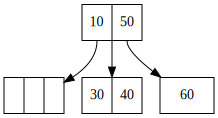

In [41]:
# shifting 2 step 2
btree_source = "digraph test {\n"
btree_source += "node [shape=record];\n"
#btree_source += "struct0 [label=\" <s00> 10| <s01> 40 | <s02> 60\"];\n"

btree_source += "struct0 [label=\" <s00> 10| <s01> 50\"];\n"

btree_source += "struct1 [label=\" |  | \"];\n"
#btree_source += "struct2 [label=\"<s20> 15 | <s21> 20 | <s22> 25 | <s23> 30 | <s24> 35\"];\n"
btree_source += "struct2 [label=\"<s20>  30  | 40 \"];\n"

btree_source += "struct3 [label=\" 60\"];\n"
#btree_source += "struct4 [label=\"| | \"];\n"
btree_source += "struct0:s00 -> struct1\n"
btree_source += "struct0:s02 -> struct2\n"

btree_source += "struct0:s01 -> struct3\n"
#btree_source += "struct0:s02 -> struct4\n"

btree_source += "}\n"

gvz = graphviz.Source(btree_source)

display(gvz)

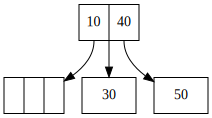

In [44]:
# merging 1 step 1 
btree_source = "digraph test {\n"
btree_source += "node [shape=record];\n"
#btree_source += "struct0 [label=\" <s00> 10| <s01> 40 | <s02> 60\"];\n"

btree_source += "struct0 [label=\" <s00> 10| <s01> 40\"];\n"

btree_source += "struct1 [label=\" |  | \"];\n"
#btree_source += "struct2 [label=\"<s20> 15 | <s21> 20 | <s22> 25 | <s23> 30 | <s24> 35\"];\n"
btree_source += "struct2 [label=\"<s20>  30  \"];\n"

btree_source += "struct3 [label=\" 50\"];\n"
#btree_source += "struct4 [label=\"| | \"];\n"
btree_source += "struct0:s00 -> struct1\n"
btree_source += "struct0:s02 -> struct2\n"

btree_source += "struct0:s01 -> struct3\n"
#btree_source += "struct0:s02 -> struct4\n"

btree_source += "}\n"

gvz = graphviz.Source(btree_source)

display(gvz)

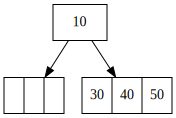

In [45]:
# merging 1 step 1 
btree_source = "digraph test {\n"
btree_source += "node [shape=record];\n"
#btree_source += "struct0 [label=\" <s00> 10| <s01> 40 | <s02> 60\"];\n"

btree_source += "struct0 [label=\" <s00> 10 \"];\n"

btree_source += "struct1 [label=\" |  | \"];\n"
#btree_source += "struct2 [label=\"<s20> 15 | <s21> 20 | <s22> 25 | <s23> 30 | <s24> 35\"];\n"
btree_source += "struct2 [label=\"<s20>  30 | 40 | 50 \"];\n"

btree_source += "struct0:s00 -> struct1\n"
btree_source += "struct0:s02 -> struct2\n"

btree_source += "}\n"

gvz = graphviz.Source(btree_source)

display(gvz)

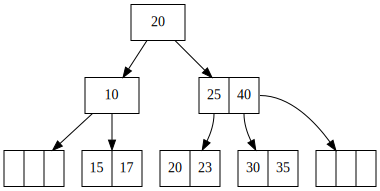

In [46]:
# deletion - 1 
btree_source = "digraph test {\n"
btree_source += "node [shape=record];\n"

btree_source += "struct0 [label=\" <s0> 20 \"];\n"
btree_source += "struct00 [label=\" <s00> 10 \"];\n"
btree_source += "struct01 [label=\" <s01> 25  | <s02> 40\"];\n"

btree_source += "struct1 [label=\" |  | \"];\n"
btree_source += "struct211 [label=\"<s20> 15 | <s200> 17  \"];\n"
btree_source += "struct212 [label=\"<s21> 20 | <s22> 23 \"];\n"

btree_source += "struct21 [label=\"<s211> 30 | <s212> 35 \"];\n"

btree_source += "struct3 [label=\"|  | \"];\n"
#btree_source += "struct4 [label=\"| | \"];\n"

btree_source += "struct0 -> struct00\n"
btree_source += "struct0 -> struct01\n"

btree_source += "struct00:s00 -> struct1\n"
btree_source += "struct00:s001 -> struct211\n"
btree_source += "struct01:s01 -> struct212\n"

btree_source += "struct01:s02 -> struct21\n"

btree_source += "struct01:s02 -> struct3\n"
#btree_source += "struct0:s02 -> struct4\n"

btree_source += "}\n"

gvz = graphviz.Source(btree_source)

display(gvz)

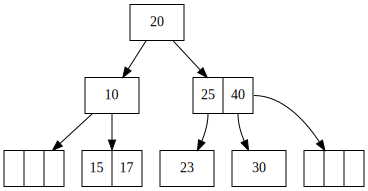

In [47]:
# deletion - 1 
btree_source = "digraph test {\n"
btree_source += "node [shape=record];\n"

btree_source += "struct0 [label=\" <s0> 20 \"];\n"
btree_source += "struct00 [label=\" <s00> 10 \"];\n"
btree_source += "struct01 [label=\" <s01> 25  | <s02> 40\"];\n"

btree_source += "struct1 [label=\" |  | \"];\n"
btree_source += "struct211 [label=\"<s20> 15 | <s200> 17  \"];\n"
btree_source += "struct212 [label=\" <s22> 23 \"];\n"

btree_source += "struct21 [label=\"<s211> 30  \"];\n"

btree_source += "struct3 [label=\"|  | \"];\n"
#btree_source += "struct4 [label=\"| | \"];\n"

btree_source += "struct0 -> struct00\n"
btree_source += "struct0 -> struct01\n"

btree_source += "struct00:s00 -> struct1\n"
btree_source += "struct00:s001 -> struct211\n"
btree_source += "struct01:s01 -> struct212\n"

btree_source += "struct01:s02 -> struct21\n"

btree_source += "struct01:s02 -> struct3\n"
#btree_source += "struct0:s02 -> struct4\n"

btree_source += "}\n"

gvz = graphviz.Source(btree_source)

display(gvz)